<a href="https://colab.research.google.com/github/smanoj9/FML/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sks
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/diabetes.csv')
data.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X=data.drop('diabetes',axis=1).values
y=data['diabetes'].values
print(X)
print(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape,y_train.shape

((576, 8), (576,))

In [ ]:
model = LogisticRegression(C=0.5)
model.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.5)

In [ ]:
model.classes_

array([0, 1])

In [ ]:
model.intercept_

array([-9.22296092])

In [ ]:
model.coef_

array([[ 0.06453044,  0.03548093, -0.012992  ,  0.00455397, -0.00159088,
         0.10124931,  0.52265145,  0.03806712]])

In [ ]:
model.predict_proba(X_train)

array([[0.08772109, 0.91227891],
       [0.7847293 , 0.2152707 ],
       [0.91995956, 0.08004044],
       ...,
       [0.32863758, 0.67136242],
       [0.21688521, 0.78311479],
       [0.94378012, 0.05621988]])

In [ ]:
y_pred = model.predict(X_train)
print(y_pred)

In [ ]:
#To Find The Accuracy
model.score(X_train,y_train)

0.7777777777777778

In [ ]:
#Confusion Matrix
confusion_matrix(y_train,y_pred)

array([[336,  41],
       [ 87, 112]])

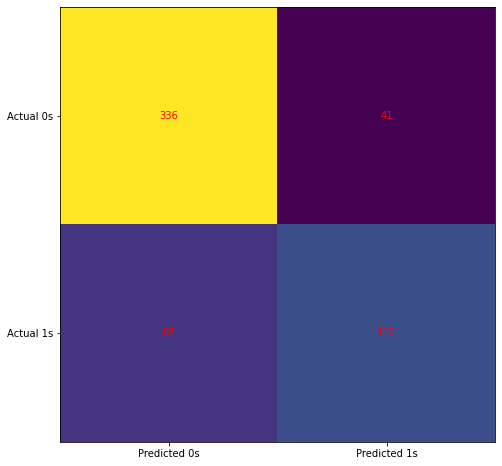

In [ ]:
#Visuvalization The Confusion Matrix
cm = confusion_matrix(y_train, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
